# Diagnose a data file

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Diagnose a data file</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-11-05</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-12-21</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">04_data_file_diagnose.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">data/norfolk.csv<br />
                                    data/year_to_date.csv</td>
    </tr>
</table>

# Introduction

- Read a csv file
- Determine the column types
- Determine the number of unique entries
- Create a filter
- Read a file with a filter
- Scatter plot of a column
- Create a munging filter

In [1]:
import pandas as pd

## Read a csv file

In [2]:
FILE_RAW = 'data/year_to_date.csv'
df = pd.read_csv(FILE_RAW,
                 parse_dates=True,
                 index_col='Time')

In [3]:
df.shape

(8689, 29)

In [4]:
# Delete weekend data.
df = df[df.index.dayofweek < 5]

In [5]:
df.shape

(6240, 29)

## Determine the column types

In [6]:
if df['Wool Target (%)'].dtype:
    print('True')
else:
    pass

True


In [7]:
# Check data type for the columns. We want float or int for numbers, not object.
df.dtypes

Water Load (lb/MSF)            object
Trim Board Density (lb/cft)    object
Trim Board Thickness (in)      object
Trim Board Weight (lb/sft)     object
Wool Target (%)                object
Wool Usage (%)                 object
Wool Flow (lb/min)             object
Starch Target (%)              object
Starch Usage (%)               object
Starch Flow (lb/min)           object
Clay Target (%)                object
Clay Usage (%)                 object
Clay Flow (lb/min)             object
Newsprint Target (%)           object
Newsprint Usage (%)            object
Perlite Target (%)             object
Perlite Usage (%)              object
Wet Clay Target (%)            object
Wet Clay Usage (%)             object
Wet Gypsum Target (%)          object
Wet Gypsum Usage (%)           object
Wet Broke Target (%)           object
Wet Broke Usage (%)            object
Dust Target (%)                object
Dust Usage (%)                 object
Broke Target (%)               object
Broke Usage 

## Determine the number of unique entries

In [8]:
for column_name in df.columns:
    print(column_name, 'has', df[column_name].nunique(), 'unique values.')

Water Load (lb/MSF) has 289 unique values.
Trim Board Density (lb/cft) has 1499 unique values.
Trim Board Thickness (in) has 78 unique values.
Trim Board Weight (lb/sft) has 229 unique values.
Wool Target (%) has 4 unique values.
Wool Usage (%) has 5995 unique values.
Wool Flow (lb/min) has 6043 unique values.
Starch Target (%) has 2 unique values.
Starch Usage (%) has 5993 unique values.
Starch Flow (lb/min) has 6193 unique values.
Clay Target (%) has 2 unique values.
Clay Usage (%) has 2 unique values.
Clay Flow (lb/min) has 6173 unique values.
Newsprint Target (%) has 2 unique values.
Newsprint Usage (%) has 5990 unique values.
Perlite Target (%) has 4 unique values.
Perlite Usage (%) has 5996 unique values.
Wet Clay Target (%) has 2 unique values.
Wet Clay Usage (%) has 1916 unique values.
Wet Gypsum Target (%) has 2 unique values.
Wet Gypsum Usage (%) has 2 unique values.
Wet Broke Target (%) has 5 unique values.
Wet Broke Usage (%) has 5989 unique values.
Dust Target (%) has 7 un

In [9]:
for column_name in df.columns:
    print(column_name, 'has', df[column_name].unique(), 'unique values.', '\n')

Water Load (lb/MSF) has ['1183.380005' '1496.340088' '1354.530029' '1378.97998' '1437.659912'
 '1305.630127' '1100.250122' '1114.920044' '1070.909912' '1051.349976'
 '1041.569946' '1046.460083' '1056.240112' '1110.029907' '1056.23999'
 '1061.129883' '1085.580078' '1075.800049' '1266.51001' '1095.359985'
 '1090.469971' '1090.470093' '1036.680054' '1124.700073' '1105.140015'
 '1105.140137' '1100.25' '1080.690186' '1095.359863' '1070.910156'
 '992.6699829' '1007.340088' '1017.119995' '1041.570068' '1119.809937'
 '1217.609985' '1188.270142' '1066.02002' '1080.690063' '1002.450012'
 '1017.120117' '997.5600586' '973.1101074' '1026.899902' '1031.789917'
 '987.7800293' '1012.230042' '1110.030029' '1051.349854' '1051.350098'
 '1066.020142' '1139.370117' '1085.579956' '1031.790039' '1026.900024'
 '1007.339966' '1012.229919' '1022.010071' '1022.009827' '1061.130005'
 '1080.689941' '1129.590088' '1124.699951' '1467' '1413.210083'
 '1432.770142' '1437.660156' '963.3300171' '1134.47998' '1070.910034

In [10]:
# Find text values for a single column.
if df['Trim Board Density (lb/cft)'].dtype == object:
    print(df[df['Trim Board Density (lb/cft)']
             .str.contains('[a-z, A-Z]')]['Trim Board Density (lb/cft)']
             .unique())
else:
    pass

['Invalid Data']


In [11]:
# Find text values in the dataframe, by column.
for column_name in df.columns:
    if df[column_name].dtype == object:
        print(column_name, df[df[column_name]
                               .str.contains('[a-z]')][column_name]
                               .unique())
    else:
        pass

Water Load (lb/MSF) ['Bad Input']
Trim Board Density (lb/cft) ['Invalid Data']
Trim Board Thickness (in) ['Invalid Data']
Trim Board Weight (lb/sft) ['Invalid Data']
Wool Target (%) ['No Data']
Wool Usage (%) ['Bad Input']
Wool Flow (lb/min) ['Bad Input']
Starch Target (%) ['No Data']
Starch Usage (%) ['Bad Input']
Starch Flow (lb/min) ['Bad Input']
Clay Target (%) ['No Data']
Clay Usage (%) ['Bad Input']
Clay Flow (lb/min) ['Bad Input']
Newsprint Target (%) ['No Data']
Newsprint Usage (%) ['Bad Input']
Perlite Target (%) ['No Data']
Perlite Usage (%) ['Bad Input']
Wet Clay Target (%) ['No Data']
Wet Clay Usage (%) ['Bad Input']
Wet Gypsum Target (%) ['No Data']
Wet Gypsum Usage (%) ['Bad Input']
Wet Broke Target (%) ['No Data']
Wet Broke Usage (%) ['Bad Input']
Dust Target (%) ['No Data']
Dust Usage (%) ['Bad Input']
Broke Target (%) ['No Data']
Broke Usage (%) ['Bad Input']
Consistency Target (%) ['Bad Input']
Consistency Actual (%) ['Bad Input']


## Create a filter

In [12]:
NA_VALUES = ['Bad Input',
             'Invalid Data',
             'No Data',
             'Calc Failed',
             'Pt Created']

## Read a file with a filter

In [13]:
df = pd.read_csv(FILE_RAW,
                 parse_dates=True,
                 index_col='Time',
                 na_values=NA_VALUES)

In [14]:
df.shape

(8689, 29)

In [15]:
df.dtypes

Water Load (lb/MSF)            float64
Trim Board Density (lb/cft)    float64
Trim Board Thickness (in)      float64
Trim Board Weight (lb/sft)     float64
Wool Target (%)                float64
Wool Usage (%)                 float64
Wool Flow (lb/min)             float64
Starch Target (%)              float64
Starch Usage (%)               float64
Starch Flow (lb/min)           float64
Clay Target (%)                float64
Clay Usage (%)                 float64
Clay Flow (lb/min)             float64
Newsprint Target (%)           float64
Newsprint Usage (%)            float64
Perlite Target (%)             float64
Perlite Usage (%)              float64
Wet Clay Target (%)            float64
Wet Clay Usage (%)             float64
Wet Gypsum Target (%)          float64
Wet Gypsum Usage (%)           float64
Wet Broke Target (%)           float64
Wet Broke Usage (%)            float64
Dust Target (%)                float64
Dust Usage (%)                 float64
Broke Target (%)         

In [16]:
# Write the file to save this munged version
FILE_MUNGED = 'data/year_to_date_munged.csv'
df.to_csv(FILE_MUNGED)

## Scatter plot of a column

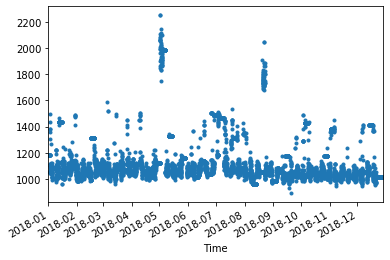

In [17]:
# Create a scatter plot of one column versus the index 'Time'.
import matplotlib.pyplot as plt
%matplotlib inline
ax = df.plot.line(y='Water Load (lb/MSF)',
                  legend=False,
                  style='.')

## Create a munging filter

In [18]:
# Munge this column with a filter.
import numpy as np
df.loc[df['Water Load (lb/MSF)'] > 1200,
       'Water Load (lb/MSF)'] = np.nan

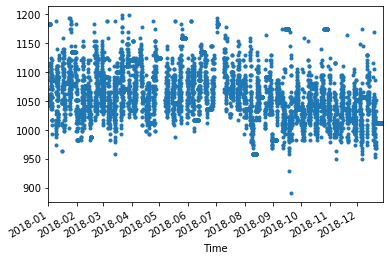

In [19]:
# Redo the scatter plot
ax = df.plot.line(y='Water Load (lb/MSF)',
                  legend=False,
                  style='.')

# Another example

In [20]:
df = pd.read_csv('data/norfolk.csv',
                 parse_dates=True,
                 index_col = 'LAB_BOARD_DAT_COD')
df.head()

,PLANT_NUM,PLANT_LINE_NUM,COMMODITY_COD,COMMODITY_NAM,PLANT_NAM,DRYER_1_DC_INLET_TEMP,DRYER_1_FEED_RATE,DRYER_1_GAS_FLOW,DRYER_1_LOCAL_NAME,DRYER_1_TYPE,...,LAB_TESTS_TRIAL_IND,LAB_MILL_SALTS,LAB_MIXER_DISP_CONS,LAB_TOTAL_DISP_CONS,LAB_VICAT_SET,LAB_STIFFENING_RATE,LAB_SIEVE_100,LAB_SIEVE_50,LAB_MILL_TEST_DAT,LAB_MILL_SOURCE_DAT
LAB_BOARD_DAT_COD,,,,,,,,,,,,,,,,,,,,,
20SEP2017:01:03:00,389,1,141260,1/2 SHEETROCK 48 IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10JAN2018:11:00:00,389,1,141134,1/2 Ultralight 48 IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24OCT2018:07:47:00,389,1,141134,1/2 Ultralight 48 IN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18AUG2009:02:19:00,389,1,141260,1/2 SHEETROCK 48 IN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29FEB2008:20:03:00,389,1,142110,5/8 FIRECODE 48 IN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.shape

(26205, 381)

In [22]:
# Drop all empty columns.
df = df.dropna(how='all', axis=1)
# Drop all empty rows.
df = df.dropna(how='all', axis=0)

In [23]:
df.shape

(26205, 255)

In [24]:
# Write the column names to a csv file, for use else.
pd.DataFrame(list(df)).to_csv('data/norfolk_column_names.csv', header=False, index=False)

In [25]:
# if a column is of type "object" (text), find the unique values.
for column_name in df.columns:
    if df[column_name].dtype == object:
        print(column_name, df[df[column_name].
            str.contains('[a-z]', na=False)][column_name].unique())

COMMODITY_NAM ['1/2 Ultralight 48 IN' '1/2 Ultralight 54 IN']
LAB_FPCODE []
LAB_FPPAPERGRADE ['Manila' 'Manila B' 'MT Manila' 'SRL Manila' 'Imperial' 'MT AR Manila'
 'Manila A' 'Carliner' 'Manila Heavy' 'Newsline' 'MT Manila HT'
 'MT Newsline' 'ICB Newsline']
LAB_BPCODE []
LAB_BPPAPERGRADE ['Newsline' 'ICB Newsline' 'MT Newsline' 'SRL Manila' 'MT AR Newsline'
 'MT AR Manila' 'Newsline SHW' 'Manila' 'Carliner' 'Imperial' 'Manila B'
 'MT Manila' 'Manila Heavy']
OPR_DRYEND_TESTTIME []
LAB_CUBE_TESTTIME []
LAB_ST_TESTTIME []
LAB_HRA_TESTTIME []
TRS_TESTTIME []
OPR_MIXER_TESTTIME []


# References

- [matplotlib pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

- [pandas plot line](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html)

- [numpy](https://docs.scipy.org/doc/)

- [pandas read csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)